# 8 вариант Корнеич Никита
Вид ириса - versicolor. Параметр - Ширина лепестка


Берем данные из приложения по заданным параметрам

X = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4,
         1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1,
         1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0,
         1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3,
         1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]

1. Нужно вычислить выборочные характеристики :
• выборочное среднее,
• выборочную дисперсию,
• несмещенную выборочную дисперсию,
• минимальную порядковую статистику,
• максимальную порядковую статистику,
• размах,
• медиану.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4,
         1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1,
         1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0,
         1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3,
         1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]

# Статистика
stat = sorted(X)

# Выборочное среднее
sample_mean = sum(stat) / len(stat)
print("Выборочное среднее: ", sample_mean)

# Выборочная дисперсия
sample_variance = sum((xi - sample_mean) ** 2 for xi in stat) / len(stat)
print("Выборочная дисперсия: ", sample_variance)

# Несмещенная выборочная дисперсия
unbiased_sample_variance = sum((xi - sample_mean) ** 2 for xi in stat) / (len(stat) - 1)
print("Несмещенная выборочная дисперсия: ", unbiased_sample_variance)

# Мин и макс порядковая статистика
min_stat = min(stat)
max_stat = max(stat)
print("Минимальная и максимальная порядковая статистика: ", min_stat, max_stat)

# Вариационный размах
R = max(stat) - min(stat)
print("Вариационный размах: ", R)

# Медиана
if len(stat) % 2 == 0:
    median = stat[int((len(stat) + 1) / 2)]
else:
    median = (stat[int(len(stat) / 2)] + stat[int((len(stat) / 2) + 1)]) / 2

print("Медиана: ", median)

Выборочное среднее:  1.3259999999999998
Выборочная дисперсия:  0.038324
Несмещенная выборочная дисперсия:  0.03910612244897958
Минимальная и максимальная порядковая статистика:  1.0 1.8
Вариационный размах:  0.8
Медиана:  1.3


2. Построить:
• график эмпирической функции распределения,
• гистограмму,
• ядерную оценку функции плотности.


График эмпирической функции распределения

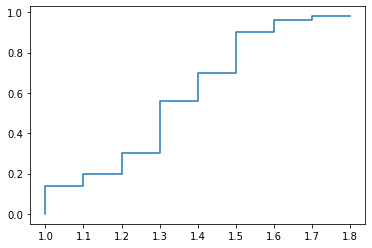

In [26]:
def ecdf(value, stat):
    return sum(xi < value for xi in stat) / len(stat)

# График эмпирической функции распределения
plt.step(stat, [ecdf(value, stat) for value in stat])


Гистограмма

(array([1.4, 0.6, 1. , 2.6, 1.4, 2. , 0.8, 0.2]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]),
 <BarContainer object of 8 artists>)

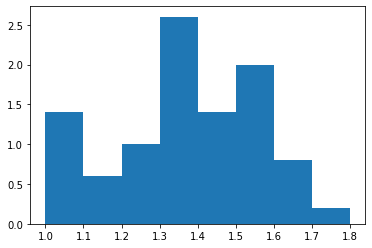

In [27]:
plt.hist(stat, 8, density=True)


Ядерная оценка функции плотности.

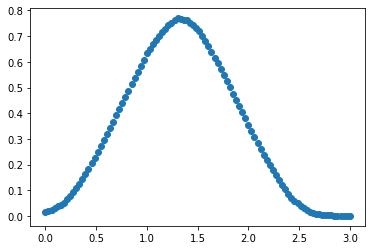

In [28]:
def h(x):
    return int(x >= 0)


def g(x):
    const = 6**0.5
    return (const - abs(x)) * h(const - abs(x)) / (const ** 2)


def f(ln, stat, x):
    return sum(g((x - xi) / ln) for xi in stat) / len(stat) / ln


def yadernaya(stat):
    ln = len(stat) ** (-1 / 5)
    xs = np.linspace(0, 3, 100)
    ys = [f(ln, stat, x) for x in xs]
    plt.scatter(xs, ys)
    
yadernaya(stat)

Построить 99% - доверительный интервал (в предположении, что
выборка подчиняется нормальному распределению с неизвестными
параметрами)
• для математического ожидания
• для дисперсии

In [29]:
import scipy.stats as sps

def confidence_intervals(stat, mean, variance):
    # Находим квантиль по таблице Стьюдента
    t = 2.58
    # Находим точность
    accurace =  t * (variance**0.5 /(len(stat))**0.5)
    print("99% доверительный интервал для мат. ожидания: [", mean - accurace, ";", mean + accurace, "]")

    epsilon = 0.01
    # Находим критические точки
    q1 = sps.chi2.ppf(epsilon / 2, len(stat))
    q2 = sps.chi2.ppf(1 - epsilon / 2, len(stat))
    
    # Левый правый интервал
    int_l = (len(stat) * variance) / q2
    int_r = (len(stat) * variance) / q1
    print("99% доверительный интервал для дисперсии: [", int_l, ";", int_r, "]")
    
confidence_intervals(stat, sample_mean, sample_variance)


99% доверительный интервал для мат. ожидания: [ 1.2545717319823586 ; 1.397428268017641 ]
99% доверительный интервал для дисперсии: [ 0.024106183407756585 ; 0.06845833275657826 ]


In [30]:
import math
def is_normal_distribution(stat, mean, variance):
    # Пусть условие значимости = 0.05
    
    def Dn():
        d_plus = 0
        for i, x_1 in enumerate(stat):
            d_plus = max(d_plus, (i + 1) / len(stat) - sps.norm(loc=mean, scale=variance).cdf(x_1))

        d_minus = 0
        for i, x_1 in enumerate(stat):
            d_minus = max(d_minus, sps.norm(loc=mean, scale=variance).cdf(x_1) - i / len(stat))
        return max(d_minus, d_plus)

    def Sk():
        return (6 * len(stat) * Dn() + 1) / (6 * math.sqrt(len(stat)))

    # Вычисляем значение статистики Колмогорова
    sk_value = Sk()
    # Крит. значение по таблице Колмогорова норм. распределения
    value = 0.9042
    
    if sk_value <= value:
        return print("Гипотеза не отвергается, т.к", sk_value," <= " , value)
    else:
        return print("Гипотеза отвергается, т.к", sk_value," > " , value)


is_normal_distribution(stat, sample_mean, sample_variance)

Гипотеза отвергается, т.к 2.9457073411283456  >  0.9042
